In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import sklearn
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.initializers import Constant
from keras.layers import PReLU

# question 1


### a

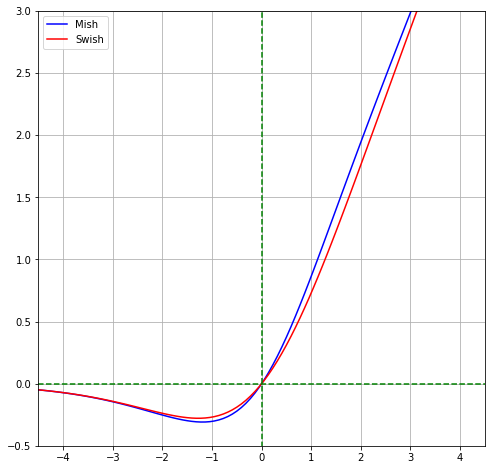

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def Mish(x):
  return x * np.tanh(np.log(1 + np.exp(x)))

def Swish(x):
  return x * sigmoid(x)


def Mish_deriteive(x):
  omega = np.exp(3*x) + 4*np.exp(2*x) + (6+4*x)*np.exp(x) + 4*(1 + x)
  delta = 1 + pow((np.exp(x) + 1), 2)
  derivative = np.exp(x) * omega / pow(delta, 2)
  return derivative 


# f(x) = σ(x) + x · σ(x)(1 − σ(x))
#      = σ(x) + x · σ(x) − x · σ(x)^2
#      = x · σ(x) + σ(x)(1 − x · σ(x))
#      = f(x) + σ(x)(1 − f(x))
def Swish_deriteive(x):
  swish = Swish(x)
  return swish + sigmoid(x) * (1 - swish)

plt.figure(figsize=(8, 8))
x = np.linspace(-4.5, 4.5, 100)
plt.plot(x, Mish(x), 'b-')
plt.plot(x, Swish(x), 'r-')
y1 = np.zeros(100)
plt.plot(x, y1, 'g--')
plt.ylim([-0.5, 3])
plt.xlim([-4.5, 4.5])
plt.plot(np.zeros(10), np.linspace(-5, 5, 10), 'g--')
plt.grid(True)
plt.legend(['Mish', "Swish"])
plt.show()


### b


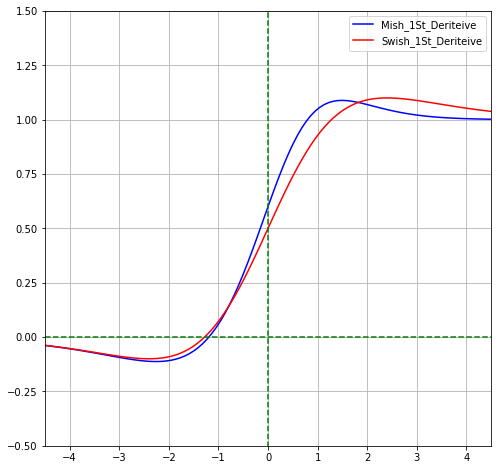

In [ ]:
plt.figure(figsize=(8,8))
x = np.linspace(-4.5, 4.5, 100)
plt.plot(x, Mish_deriteive(x), 'b-')
plt.plot(x, Swish_deriteive(x), 'r-')
y1 = np.zeros(100)
plt.plot(x, y1, 'g--')
plt.ylim([-0.5, 1.5])
plt.xlim([-4.5, 4.5])
plt.plot(np.zeros(10), np.linspace(-5, 5, 10), 'g--')
plt.grid(True)
plt.legend(['Mish_1St_Deriteive', "Swish_1St_Deriteive"])
plt.show()


# question 3

In [4]:
# download datas
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f'train shape \t x_train : {x_train.shape} and y_train : {y_train.shape} ')
print(f'test shape \t x_test : {x_test.shape} and y_test : {y_test.shape} ')


train shape 	 x_train : (60000, 28, 28) and y_train : (60000,) 
test shape 	 x_test : (10000, 28, 28) and y_test : (10000,) 


In [6]:
def display_image(x, y):
  plt.figure(figsize=(10,5))

  for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(y[i])

  plt.show()

def data_augmentation():
  print(f'before augmentation : train\tx:{x_train.shape} , y:{y_train.shape}  test\tx:{x_test.shape} , y:{y_test.shape}')
  new_train = 255.0 - x_train
  new_test = 255.0 - x_test
  
  new_x_train = np.concatenate((x_train, new_train), axis=0)
  new_y_train = np.concatenate((y_train, y_train), axis=0)

  new_x_test = np.concatenate((x_test, new_test), axis=0)
  new_y_test = np.concatenate((y_test, y_test), axis=0)

  print(f'after augmentation : train\tnew_x:{new_x_train.shape} , new_y:{new_y_train.shape}  test\tnew_x{new_x_test.shape} , new_y:{new_y_test.shape}')
  print('*'*50)

  X_train, Y_train = sklearn.utils.shuffle(new_x_train, new_y_train, random_state=1)
  X_test, Y_test = sklearn.utils.shuffle(new_x_test, new_y_test, random_state=1)

  print('Test data', X_test.shape, Y_test.shape)
  print('Train data', X_train.shape, Y_train.shape)

  assert X_train.shape == (120000, 28, 28)
  assert X_test.shape == (20000, 28, 28)
  assert Y_train.shape == (120000,)
  assert Y_test.shape == (20000,)

  return (X_train, Y_train) , (X_test, Y_test)

before augmentation : train	x:(60000, 28, 28) , y:(60000,)  test	x:(10000, 28, 28) , y:(10000,)
after augmentation : train	new_x:(120000, 28, 28) , new_y:(120000,)  test	new_x(20000, 28, 28) , new_y:(20000,)
**************************************************
Test data (20000, 28, 28) (20000,)
Train data (120000, 28, 28) (120000,)


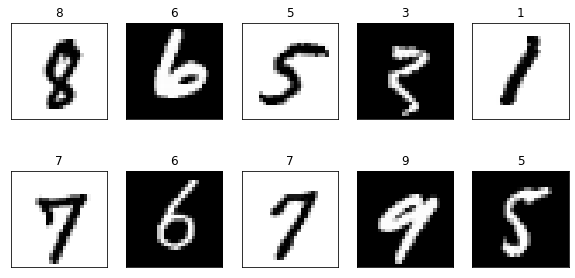

In [7]:
# data augmentation 
(X_train, Y_train), (X_test, Y_test) = data_augmentation()

# display the images
display_image(X_train, Y_train)

In [8]:
# pre-processing

def preproccessing(x, y):  
  a, b, c = x.shape
  new_shape = (a, b, c, 1)
  norm_x = x / 255
  norm_x = np.reshape(norm_x, newshape=new_shape)
  cat_y = tf.keras.utils.to_categorical(y, dtype='float32')
  return norm_x, cat_y

X_train, Y_train = preproccessing(X_train, Y_train)
X_test, Y_test = preproccessing(X_test, Y_test)


print(f'y_train shape : {Y_train.shape}')
print(f'y_test shape : {Y_test.shape}')
print(f'x_train shape : {X_train.shape}')
print(f'x_test shape : {X_test.shape}')
print('**'*50)
print(f'x_train is between : max : {np.max(X_train)}\tmin : {np.min(X_train)}')
print(f'x_test is between : max : {np.max(X_test)}\tmin : {np.min(X_test)}')


y_train shape : (120000, 10)
y_test shape : (20000, 10)
x_train shape : (120000, 28, 28, 1)
x_test shape : (20000, 28, 28, 1)
****************************************************************************************************
x_train is between : max : 1.0	min : 0.0
x_test is between : max : 1.0	min : 0.0


In [9]:
INPUT_SHAPE = X_train.shape[1:]

alphas = [-1, -0.5, 0, 0.5, 1]
EPOCH_NUM = 5
BATACH_SIZE = 128

def create_model(alpha) -> keras.Model:
  model = keras.Sequential()
  model.add(layers.Conv2D(filters=8, kernel_size=(7,7), activation=layers.LeakyReLU(alpha=alpha), input_shape=INPUT_SHAPE))
  model.add(layers.Conv2D(filters=8, kernel_size=(5,5), activation=layers.LeakyReLU(alpha=alpha)))
  model.add(layers.Flatten())
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

m = create_model(0.1)
print(m.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 8)         400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 8)         1608      
_________________________________________________________________
flatten (Flatten)            (None, 2592)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                25930     
Total params: 27,938
Trainable params: 27,938
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
all_historys = []

i = 0

for alpha in alphas:
  print(f'Train for alpha = {alpha} : ')
  
  callbacks = [TensorBoard(log_dir=f'logs_{i}',
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True,
                         update_freq='epoch',
                         profile_batch=2,
                         embeddings_freq=1)]
  i+=1
  model = create_model(alpha=alpha)
  his = model.fit(X_train, Y_train, batch_size=BATACH_SIZE, epochs=EPOCH_NUM, validation_split=0.3 , verbose=1, callbacks=callbacks)
  all_historys.append((his, alpha, model))


Train for alpha = -1 : 
Epoch 1/5
657/657 [==============================] - 7s 9ms/step - loss: 0.2545 - accuracy: 0.9236 - val_loss: 0.0801 - val_accuracy: 0.9749
Epoch 2/5
657/657 [==============================] - 6s 9ms/step - loss: 0.0785 - accuracy: 0.9758 - val_loss: 0.0890 - val_accuracy: 0.9719
Epoch 3/5
657/657 [==============================] - 5s 8ms/step - loss: 0.0585 - accuracy: 0.9818 - val_loss: 0.0562 - val_accuracy: 0.9830
Epoch 4/5
657/657 [==============================] - 6s 9ms/step - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.0645 - val_accuracy: 0.9802
Epoch 5/5
657/657 [==============================] - 6s 9ms/step - loss: 0.0415 - accuracy: 0.9865 - val_loss: 0.0610 - val_accuracy: 0.9813
Train for alpha = -0.5 : 
Epoch 1/5
657/657 [==============================] - 7s 9ms/step - loss: 0.2587 - accuracy: 0.9214 - val_loss: 0.1094 - val_accuracy: 0.9651
Epoch 2/5
657/657 [==============================] - 6s 9ms/step - loss: 0.0784 - accuracy: 0.9755 - val

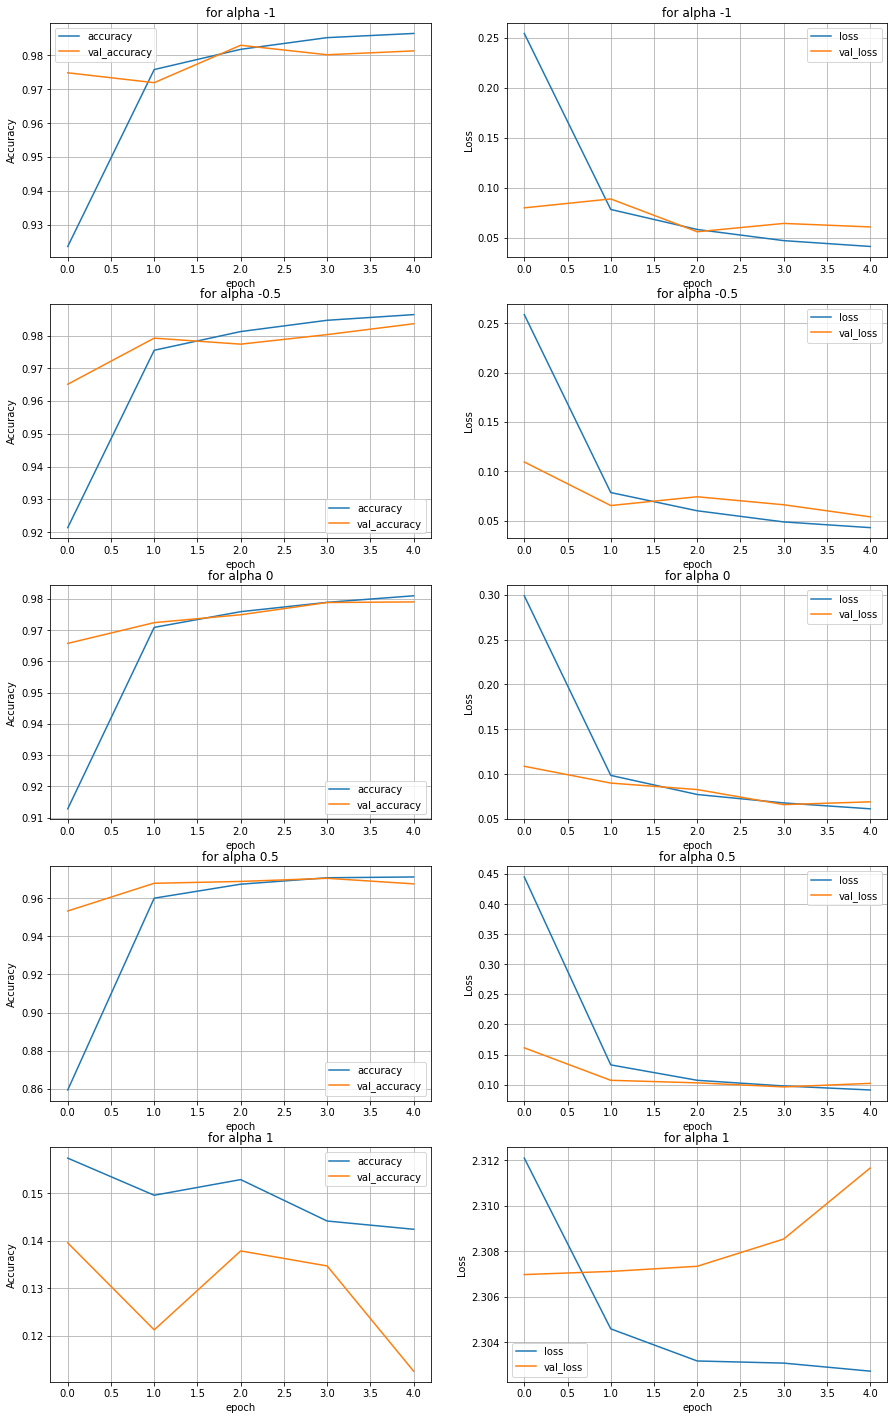

In [26]:
plt.figure(figsize=(15,25))
j = 1
for his, alpha, model in all_historys:
  plt.subplot(5, 2, j)
  plt.plot(his.history['accuracy'])
  plt.plot(his.history['val_accuracy'])
  plt.grid(True)
  plt.title(f'for alpha {alpha}')
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.legend(['accuracy', 'val_accuracy'])
  j+=1
  plt.subplot(5, 2, j )
  plt.plot(his.history['loss'])
  plt.plot(his.history['val_loss'])
  plt.grid(True)
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.title(f'for alpha {alpha}')
  plt.legend(['loss', 'val_loss'])
  j+=1
plt.show()

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

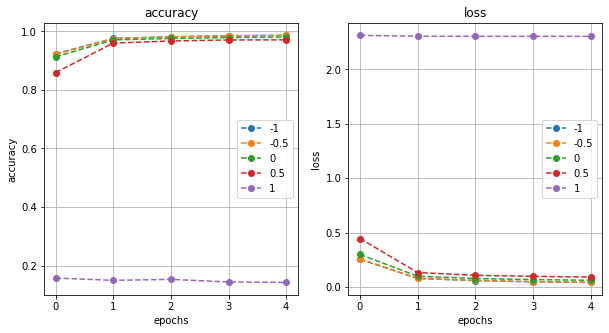

In [27]:
# display_historys
def display_history(historys)->None:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.grid(True)
  plt.title('accuracy')
  for history, alpha, m in historys:
    m.save(f'model_{alpha}.h5')
    plt.plot(history.history['accuracy'], 'o--')
    # plt.plot(history.history['val_accuracy'], 'o--')
  plt.legend(alphas, loc='center right')
  
  plt.subplot(1,2,2)
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.grid(True)
  plt.title('loss')
  for history, alpha, m in historys:
    plt.plot(history.history['loss'],'o--')
    # plt.plot(history.history['val_loss'],'bo--')
  plt.legend(alphas, loc='center right')
  
  plt.show()


display_history(all_historys)

In [28]:
# compute the accuracy of each model
for _, alpha, mod in all_historys:
  accuracy = mod.evaluate(X_test, Y_test, verbose=0)
  print(f'Loss and Accuracy for model with alpha : {alpha} ========> {accuracy}')

Loss and Accuracy for model with alpha : -1 ========> [0.06468271464109421, 0.9809499979019165]
Loss and Accuracy for model with alpha : -0.5 ========> [0.05204430967569351, 0.9836000204086304]
Loss and Accuracy for model with alpha : 0 ========> [0.06814641505479813, 0.9799500107765198]
Loss and Accuracy for model with alpha : 0.5 ========> [0.09114497154951096, 0.9713500142097473]
Loss and Accuracy for model with alpha : 1 ========> [2.3053808212280273, 0.1246500015258789]


### PRelu

In [61]:
def create_model_PRelu():
  model = keras.Sequential()
  model.add(layers.Conv2D(filters=8, kernel_size=(7,7), activation=PReLU(alpha_initializer=Constant(value=-1), shared_axes=[1, 2]), input_shape=INPUT_SHAPE))
  model.add(layers.Conv2D(filters=8, kernel_size=(5,5), activation=PReLU(alpha_initializer=Constant(value=-1), shared_axes=[1, 2])))
  model.add(layers.Flatten())
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

print(create_model_PRelu().summary())

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 22, 22, 8)         408       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 18, 18, 8)         1616      
_________________________________________________________________
flatten_26 (Flatten)         (None, 2592)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                25930     
Total params: 27,954
Trainable params: 27,954
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
# define and train model with PRelu activation function 
callbacks = [TensorBoard(log_dir='logs',
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True,
                         update_freq='epoch',
                         profile_batch=2,
                         embeddings_freq=1)]
model_prelu = create_model_PRelu()
his = model_prelu.fit(X_train, Y_train, batch_size=BATACH_SIZE, epochs=EPOCH_NUM, validation_split=0.2 , verbose=1, callbacks=callbacks)


Epoch 1/5
750/750 [==============================] - 8s 10ms/step - loss: 0.2197 - accuracy: 0.9352 - val_loss: 0.0925 - val_accuracy: 0.9709
Epoch 2/5
750/750 [==============================] - 6s 8ms/step - loss: 0.0824 - accuracy: 0.9751 - val_loss: 0.0779 - val_accuracy: 0.9763
Epoch 3/5
750/750 [==============================] - 7s 9ms/step - loss: 0.0619 - accuracy: 0.9812 - val_loss: 0.0728 - val_accuracy: 0.9771
Epoch 4/5
750/750 [==============================] - 7s 9ms/step - loss: 0.0545 - accuracy: 0.9830 - val_loss: 0.0572 - val_accuracy: 0.9830
Epoch 5/5
750/750 [==============================] - 6s 9ms/step - loss: 0.0477 - accuracy: 0.9848 - val_loss: 0.0593 - val_accuracy: 0.9816


625/625 [==============================] - 2s 4ms/step - loss: 0.0647 - accuracy: 0.9801
[0.06469642370939255, 0.9800500273704529]


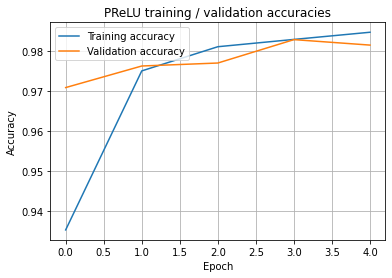

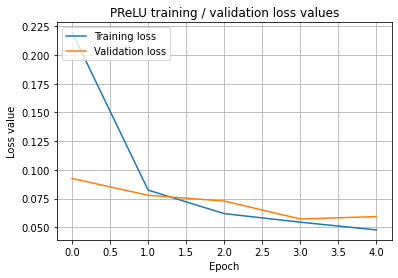

In [63]:
# evaluate and plot the accuracy & loss of model
print(model_prelu.evaluate(X_test, Y_test))

plt.plot(his.history['accuracy'], label='Training accuracy')
plt.plot(his.history['val_accuracy'], label='Validation accuracy')
plt.title('PReLU training / validation accuracies')
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(his.history['loss'], label='Training loss')
plt.plot(his.history['val_loss'], label='Validation loss')
plt.title('PReLU training / validation loss values')
plt.ylabel('Loss value')
plt.grid(True)
plt.xlabel('Epoch')

plt.legend(loc="upper left")
plt.show()

In [64]:
def print_alpha(conv2d: Conv2D) -> None:
  we = conv2d.get_weights()
  alphas = we[2]
  print(f'Alpha is between {np.min(alphas)} < alpha < {np.max(alphas)}\n')
  print(f'The mean of alphas is : {np.mean(alphas)}\n')
  print('**' * 50)

model_layers = model_prelu.layers
conv2d_1 = model_layers[0]
conv2d_2 = model_layers[1]

print(f'First convolutional Layer : \n')
print_alpha(conv2d= conv2d_1)

print(f'Second convolutional Layer : \n')
print_alpha(conv2d= conv2d_2)




First convolutional Layer : 

Alpha is between -1.118366003036499 < alpha < -0.33072641491889954

The mean of alphas is : -0.7749289274215698

****************************************************************************************************
Second convolutional Layer : 

Alpha is between -1.1054763793945312 < alpha < -0.9325587153434753

The mean of alphas is : -1.0039910078048706

****************************************************************************************************
